In [1]:
!pip install seaborn
!pip install pandas
!pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [3]:
# Breast cancer 데이터셋 로드
dataset = pd.read_csv("breast_cancer.csv")

# 데이터 정보 출력
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

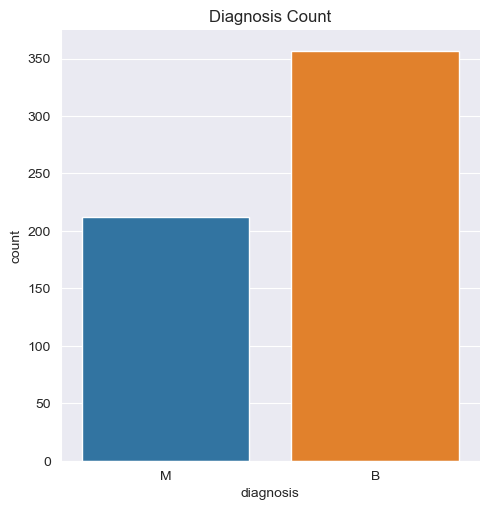

In [4]:
# 'diagnosis' 열을 문자열로 변환
dataset['diagnosis'] = dataset['diagnosis'].astype(str)

# 'radius_mean'을 이산형으로 변환하여 시각화
dataset['radius_mean_bin'] = pd.qcut(dataset['radius_mean'], q=4, labels=False)
dataset['radius_mean_bin'] = dataset['radius_mean_bin'].astype(str)

# catplot 실행
sns.catplot(x="diagnosis", hue="radius_mean_bin", kind="count", data=dataset)
plt.title('Diagnosis Count by Radius Mean Bin')
plt.show()

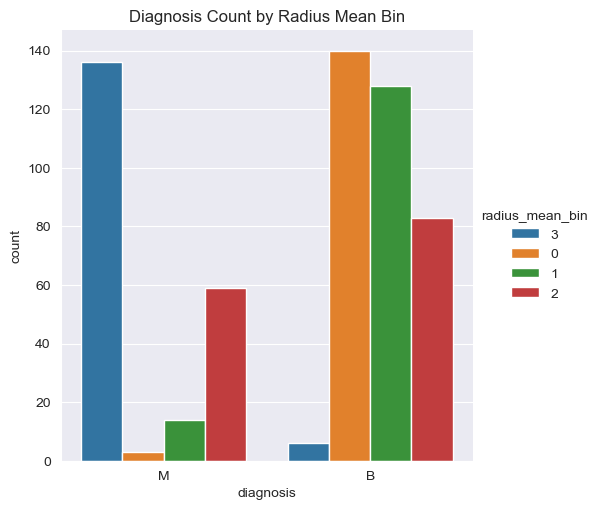

In [8]:
# 'diagnosis' 열을 문자열로 변환
dataset['diagnosis'] = dataset['diagnosis'].astype(str)

# 'radius_mean'을 이산형으로 변환하여 시각화
dataset['radius_mean_bin'] = pd.qcut(dataset['radius_mean'], q=4, labels=False)
dataset['radius_mean_bin'] = dataset['radius_mean_bin'].astype(str)

# catplot 실행
sns.catplot(x="diagnosis", hue="radius_mean_bin", kind="count", data=dataset)
plt.title('Diagnosis Count by Radius Mean Bin')
plt.show()

In [9]:
# 불필요한 열 제거 (필요한 경우)
# 예시: dataset.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# 결측값 처리 (NaN 값을 평균값으로 대체)
imputer = SimpleImputer(strategy='mean')
dataset.iloc[:, 2:] = imputer.fit_transform(dataset.iloc[:, 2:])

# 'diagnosis' 열을 0과 1로 변환 (악성: 1, 양성: 0)
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

# 피처와 타겟 설정
X = dataset.drop(columns=['diagnosis'])
y = dataset['diagnosis']

NameError: name 'SimpleImputer' is not defined